In [1]:
import pandas as pd
import numpy as np

from mistralai.client import MistralClient
import mistral_config

client = MistralClient(api_key=mistral_config.api_key)

import seaborn as sns
from sklearn.manifold import TSNE

import os


In [2]:
df = pd.read_csv('data/balanced_corpus.csv')
df

,Unnamed: 0,text,place,uri,collector,area,lat,lon
0,105697,Γέλια σαν κομπολόγια,"Ήπειρος, Ζαγόρι, Βίτσα",http://hdl.handle.net/20.500.11853/168435,"Σάρρος, Δημήτριος Μ.",Ήπειρος,37.998253,23.737867
1,8413,Καρδίαν καθαράν θέλ' ο Θεός,Ήπειρος,http://hdl.handle.net/20.500.11853/167032,"Γόνιος, Α.",Ήπειρος,37.998253,23.737867
2,7684,Ου Θεός κι ου γείτονας,Ήπειρος,http://hdl.handle.net/20.500.11853/168991,"Γαλδέμης, Αναστάσιος Δ.",Ήπειρος,37.998253,23.737867
3,18546,Θέλει να κρυφθή πίσω από το δάχτυλό του,Ήπειρος,http://hdl.handle.net/20.500.11853/273352,"Ζηκίδης, Γεώργιος Δ.",Ήπειρος,37.998253,23.737867
4,94001,Όλοι κλαίν' τα χάλια τ'ς κι ο μυλωνάς τη δέσι,Ήπειρος,http://hdl.handle.net/20.500.11853/204755,"Παπαγεωργίου, Ιωάννης",Ήπειρος,37.998253,23.737867
...,...,...,...,...,...,...,...,...
11495,101735,Παστρζικό τσανα τσ' έναι!,Σκύρος,http://hdl.handle.net/20.500.11853/247609,"Περδίκα, Νίκη Λ.",Σκύρος,38.873044,24.524477
11496,101233,"Κάλλιο γεναίκα κάμισσα, πέρζι πολυπροικούσα",Σκύρος,http://hdl.handle.net/20.500.11853/195541,"Περδίκα, Νίκη Λ.",Σκύρος,38.873044,24.524477
11497,101612,Όγοιος κάθεται στη στερζά τσαί θάλασσα γερεύει...,Σκύρος,http://hdl.handle.net/20.500.11853/195683,"Περδίκα, Νίκη Λ.",Σκύρος,38.873044,24.524477
11498,101762,Πήε στ' δαιμόνου τ' μάννα,Σκύρος,http://hdl.handle.net/20.500.11853/195537,"Περδίκα, Νίκη Λ.",Σκύρος,38.873044,24.524477


In [3]:
df['area'].value_counts()

area
Ήπειρος            500
Κεφαλληνία         500
Ρόδος              500
Πόντος             500
Νάξος              500
Μικρά Ασία         500
Μακεδονία          500
Λακωνία            500
Λέσβος             500
Κύπρος             500
Κρήτη              500
Κάρπαθος           500
Αιτωλία            500
Ιωάννινα           500
Θράκη              500
Θεσπρωτία          500
Εύβοια             500
Επτάνησος          500
Αχαΐα              500
Αρκαδία            500
Ανατολική Θράκη    500
Αμοργός            500
Σκύρος             500
Name: count, dtype: int64

In [4]:
def get_embeddings_by_chunks(data, chunk_size):
    chunks = [data[x : x + chunk_size] for x in range(0, len(data), chunk_size)]
    embeddings_response = [
        client.embeddings(model="mistral-embed", input=c) for c in chunks
    ]
    return [d.embedding for e in embeddings_response for d in e.data]


In [5]:
if not os.path.exists("mistral_embeddings.csv"):
    embeddings = get_embeddings_by_chunks(df["text"].tolist(), 50)
    df_emb = pd.DataFrame(embeddings)
    df_emb.to_csv('mistral_embeddings.csv', index=False)
    df_emb.to_pickle('mistral_embeddings.pkl')
else:
    df_emb = pd.read_csv("mistral_embeddings.csv")
df_emb

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.045319,0.013618,0.042206,0.025909,0.018265,0.041809,0.026352,0.030487,-0.003994,-0.029846,...,-0.076294,0.037018,0.030579,0.047882,0.003952,0.041168,0.016098,-0.016006,-0.003843,-0.017303
1,-0.023178,0.027985,0.051025,-0.010124,0.015030,0.054596,0.041901,0.001780,0.000803,-0.039734,...,-0.009613,0.000394,0.014992,0.002359,0.004848,0.022339,-0.004574,-0.028046,-0.009193,-0.016754
2,-0.022980,0.023071,0.050018,-0.009956,0.049286,0.021866,0.030914,0.026230,0.012886,-0.021835,...,-0.042633,0.009422,0.048859,0.016449,-0.005806,0.013916,0.017410,-0.031677,-0.007896,-0.015686
3,-0.025223,0.011345,0.029755,0.016342,0.036499,0.017685,0.004257,0.025589,0.017365,-0.032349,...,-0.030014,0.014488,0.035156,0.011833,0.011566,0.012810,-0.024399,-0.021286,-0.009590,0.015106
4,-0.016510,0.036987,0.058960,0.017197,0.030289,0.058105,0.048279,-0.008171,-0.028763,-0.007767,...,-0.041321,-0.004757,0.020615,0.031555,-0.010170,0.033569,0.016891,-0.017426,-0.002066,-0.010353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-0.020050,0.014511,0.045380,0.032440,0.048859,0.030960,0.053253,0.009613,0.011047,-0.024948,...,-0.013588,0.015198,0.016449,0.019440,0.009254,0.045227,0.008003,-0.017654,-0.007454,0.007866
11496,-0.016739,0.053040,0.046692,0.015900,0.021469,0.045349,0.015205,0.018188,-0.010826,-0.009918,...,-0.029526,0.014664,0.023880,0.027039,0.022324,0.021210,-0.007122,-0.011734,-0.008125,-0.019485
11497,-0.018768,0.034973,0.074402,0.007786,0.015121,0.027817,0.047913,-0.003679,-0.001426,-0.036377,...,-0.035126,0.020477,0.017166,0.030365,0.018692,0.013756,0.003838,0.003334,0.002562,-0.021988
11498,-0.018616,0.014015,0.063232,0.009392,0.026138,0.046570,0.011543,0.016693,0.015747,-0.036835,...,-0.028656,0.035767,0.014420,0.015793,-0.004513,0.002291,0.021698,0.001718,0.003447,-0.019928


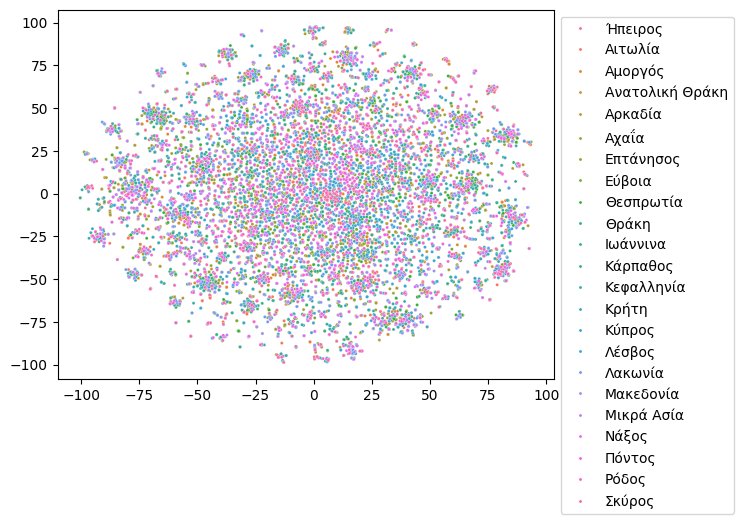

In [7]:
tsne = TSNE(n_components=2, random_state=0).fit_transform(df_emb)
ax = sns.scatterplot(x=tsne[:, 0], 
                     y=tsne[:, 1], 
                     s=5,
                     hue=np.array(df['area'].to_list()))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))